#PyTorch Workflow

Let's explore a an example PyTorch end-to-end workflow.

In [ ]:
what_were_covering = {1: "data (prepare and load)",
                      2: "build model",
                      3: "fitting the model to data (training)",
                      4: "making predictions and evaluating a model (inference)",
                      5: "saving and loading a model",
                      6: "putting it all together"}
what_were_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluating a model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [ ]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural network
import matplotlib.pyplot as plt

#Check Pytorch version
torch.__version__

'2.1.0+cu121'

## 1. Data (Preparing and loading)

Data can be almost anything.. in machine learning

* Excel spreadsheet
* Images of any kind
* Videos
* Audio
* DNA
* Text

Machne learning is a game of two parts:
1. Get data into a numerical representation
2. Build a model to learn patterns in that numerical representation.

To showcase this, let's create some *known* data using the linear regression model

We'll use a linear regression formula to make a straight line with *known* parameters


In [ ]:
# Create *known* parameters
weight = 0.7
bias = 0.3

#Create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

### Splitting Data into training and testing sets (One of the most important concepts in machine learning in general)

Let's create a training and test set for our data

In [ ]:
# Create a train/test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:],y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

How might we better visualize data?

This is where the data explorers motto comes in!

"Visualize, Visualize, Visualize"

In [ ]:
def plot_prediction(train_data=X_train,
                    train_labels=y_train,
                    test_data=X_test,
                    test_labels=y_test,
                    predictions=None):
  """
  Plots training data, test data and compare predictions.
  """

  plt.figure(figsize=(10,7))

  #Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  #Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  #Are there predictions?
  if predictions is not None:
    #Plot the predictions if the exist
    plt.scatter(test_data, predictions, c="r", s=4, label="Predctions")

  #Show the legend
  plt.legend(prop={"size": 14})

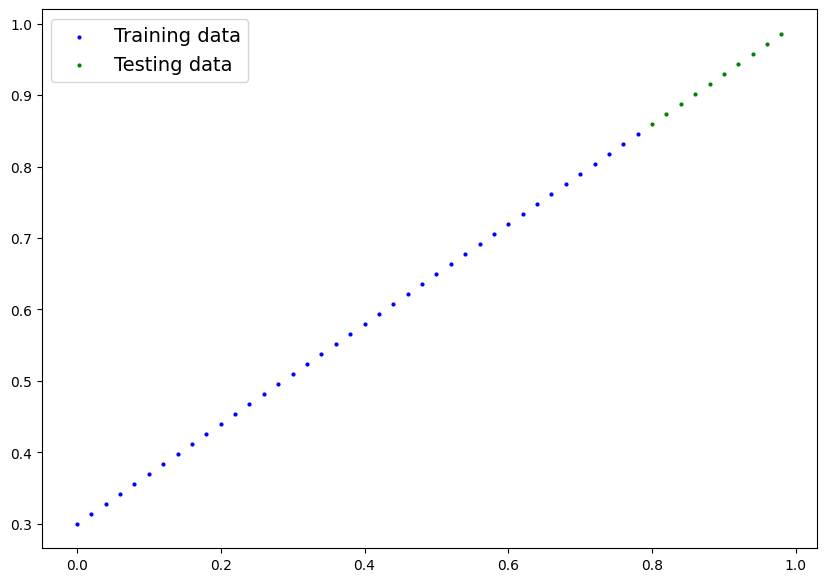

In [ ]:
plot_prediction()

## Building our first PyTorch Model

Because we're going to building classes through the course.
Refer https://realpython.com/python3-object-oriented-programming/#classes-vs-instances

What our model does:
* Start with random values (weight and bias)
* Look at training data and adjust the random value to better represent (or get closer to) the ideal values (the weight and bias values we used to create the data)
*  How does it do so?

Through two main algorithms:
1. Gradient descent
2. Back Propogation

In [ ]:
from torch import nn

#Create linear Regression model class

class LinearRegressionModel(nn.Module): # almost everything in Pytorch inherits from nn.Module
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, requires_grad=True,
                                             dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype = torch.float))
  #Forward method to define the computation inn the model
  def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input
    return self.weights * x + self.bias #This is the linear regression formula


In [ ]:
# model_0.state_dict()

### PyTorch model building essentials

* torch.nn - contains all of the buildings for computational graphs (a neural network can be considered as the computational graph)
* torch.nn.Parameter - what parameters should our model try and learn, often a pytorch layer from torch.nn will set these for us
* torch.nn.Module - The base class for all neural network modules, if you subclass it, you should overwrite forward()
* torch.optim - this where the optimizers in Pytorch live, they will help the gradient descent
* def forward() - All nn.Module subclasses require you to overwrite forward(), this method defines what happens int he forward computation

### Checking the contents of  our PyTorch model

Now we've created a model, lets see what's inside...
So we can check our model parameters or what's inside our model using .parameters()

In [ ]:
# Create a random seed
torch.manual_seed(42)

#Create an instance of the model (this is asubclass of nn.modules)
model_0 = LinearRegressionModel()

# Check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
weight, bias

(0.7, 0.3)

In [ ]:
X_test,y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

### Making predictions using 'torch.inference_model()'

To check our model predictive power, lets see how well it predicts 'y_test' based on 'X_test'

When we pass data through our model, it's going to run it through the forward() method

In [ ]:
#  Make predictions with model
# with torch.inference_mode():
#   y_preds = model_0(X_test)

# You can use similar method to this which is torch.no_grad()
with torch.no_grad():
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [ ]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

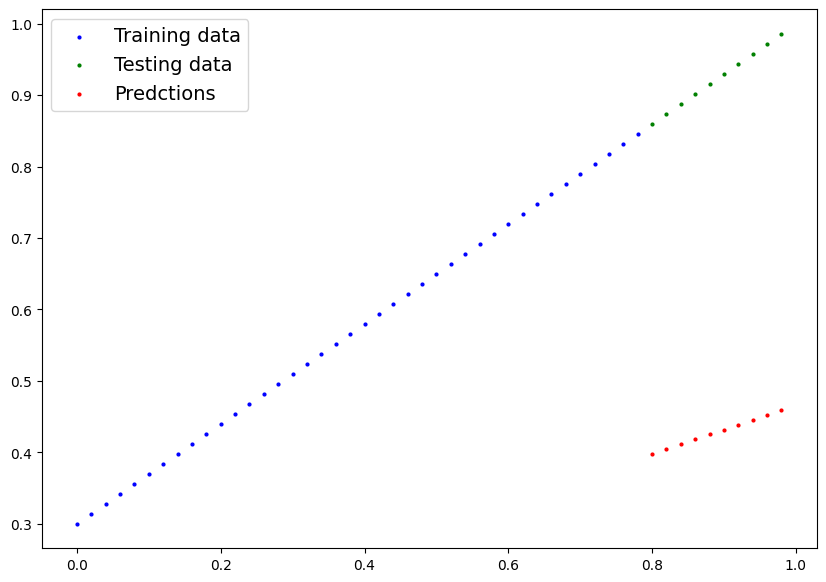

In [ ]:
plot_prediction(predictions=y_preds)

See more on inference mode here - https://twitter.com/PyTorch/status/1437838231505096708?lang=en

## Train Model

The whole idea of training is for a model to move from some *unknown parameters (these may be random) to some known parameters.

Or in other words from a poor representation of the data to a better representation of the data

One way to measure how poor or how wrong your model prediction are is to use the loss functions.

* Note: Loss function may also be called cost function or criterion in digfferent areas. For our case, we're going to it as a loss function

* **Loss Function** A function to measure how wrong your model's predictions are to the ideal outputs, lower is better

* **Optimizer** Takes into account the loss of a model and adjusts the model's parameters(e.g. weight & bias) to improve the loss function and specifically for pytorch we need a training loop and testing loop

In [ ]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
#Check out our model's parameters (a parameer is a value that the model sets itself)

model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
#Setup a loss_function
loss_fn = nn.L1Loss()

#setup an optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01) #lr = learning rate == possibly he most important hyperparameter you can

In [ ]:
loss_fn

L1Loss()

### Building a training loop and testing loop in pYtorch

A couple of things we need in a training loop:
1. Loop through the data
2. Forward pass (this involes data moving through our model's 'forward()' functions) - also called forward propagation
3. Calculate the loss (compare forward pass predictions to ground truth labels )
4. Optimizer zero grad
5. Loss backward - move backword through the network to calculate the gradients of each of the parametters of our model with respect to the loss (**Backpropagation**)
6. Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss (**gradient descent**)

In [ ]:
# An epoch is one loop through the data... (this is a hyperparameter because we've set it by ourself)
epochs=200

#Tracking differentt values
epoch_count = []
loss_values = []
test_loss_values = []
###Training
# 0. Loop through the data
for epoch in range(epochs):
  #Set the models to training mdoe
  model_0.train() #train mode in Pytorch sets all parameters that require gradients to require gradients

  # 1. Forward pass
  y_pred = model_0(X_train)

  # 2. Calculate a loss
  loss = loss_fn(y_pred, y_train)
  print(f"Loss : {loss}")

  # Optimizer zero grad
  optimizer.zero_grad()

  #4. Perform backpropogation on the loss with respect to the parameters of the model
  loss.backward()

  #5. Step the optimizer (perform gradient descent)
  optimizer.step()

  ### Testing
  model_0.eval() #turns off different setting in the mdoel not needed of evaluation/testing (dropout/ batch norm layers)
  with torch.inference_mode(): # turns off gradient tracking and couple of more things behind the scenes
  # with torch.no_grad(): # you may also see torch.no_grad() in other pytorch code
    # 1. Do the forward pass in testing
    test_pred = model_0(X_test)

    # 2. Calculate the loss
    test_loss = loss_fn(test_pred, y_test)

  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")

    print(model_0.state_dict())

Loss : 0.31288138031959534
Epoch: 0 | Loss: 0.31288138031959534 | Test loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Loss : 0.3013603389263153
Loss : 0.28983935713768005
Loss : 0.2783183455467224
Loss : 0.26679736375808716
Loss : 0.2552763521671295
Loss : 0.24375534057617188
Loss : 0.23223432898521423
Loss : 0.22071333229541779
Loss : 0.20919232070446014
Loss : 0.1976713240146637
Epoch: 10 | Loss: 0.1976713240146637 | Test loss: 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Loss : 0.18615034222602844
Loss : 0.1746293306350708
Loss : 0.16310831904411316
Loss : 0.1515873372554779
Loss : 0.14006635546684265
Loss : 0.1285453587770462
Loss : 0.11702437698841095
Loss : 0.1060912236571312
Loss : 0.09681284427642822
Loss : 0.08908725529909134
Epoch: 20 | Loss: 0.08908725529909134 | Test loss: 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Loss : 0.082

In [ ]:
import numpy as np
np.array(torch.tensor(loss_values).numpy())

array([0.31288138, 0.19767132, 0.08908726, 0.05314853, 0.04543797,
       0.04167863, 0.03818933, 0.0347609 , 0.03132383, 0.0278874 ,
       0.02445896, 0.02102021, 0.01758547, 0.01415539, 0.01071659,
       0.00728353, 0.00385178, 0.00893248, 0.00893248, 0.00893248],
      dtype=float32)

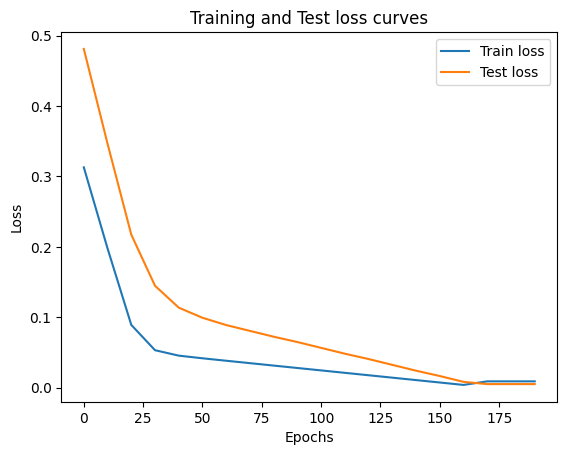

In [ ]:
#Plot the loss curves
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and Test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [ ]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

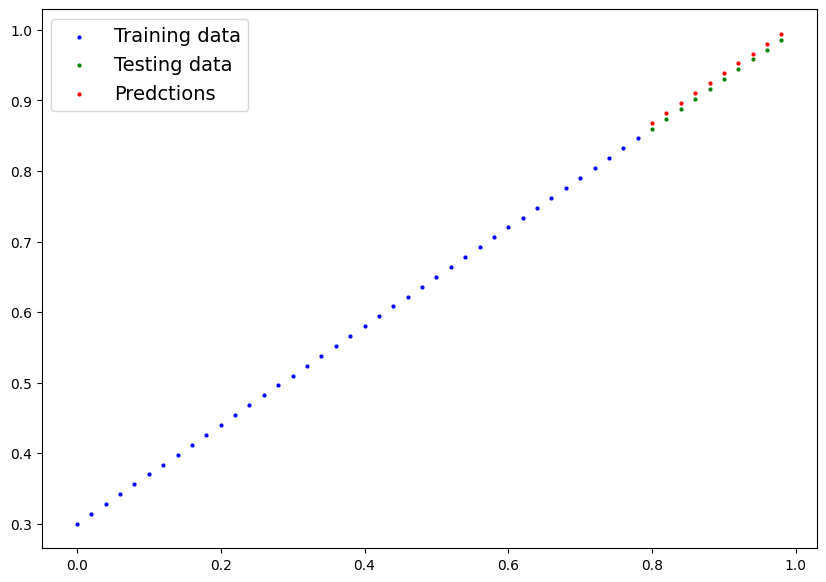

In [ ]:
plot_prediction(predictions=y_preds_new);

## Saving a Model in PyTorch

There are 3 main methods you should know about for saving and loading models in PyTorch


1. 'torch.save()' - allows you save a PyTorch object in Python''s pickle format
2. 'torch.load()' - allows you to load a saved PyTorc object.
3. 'torch.nn.Module.load_state_dict()' - this allows to load a model's saved state dictionary.

In [ ]:
#Saving our PyTorch model
from pathlib import Path

#1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok = True)

#2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

#3. Save the model
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_0.pth


In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
ls -l models

total 4
-rw-r--r-- 1 root root 1680 Mar 12 09:54 01_pytorch_workflow_model_0.pth


## Loading a PyyTorch model

Since we saved our model's 'state_dict()' rather than the entire model, we'll create a new instance of our mdoel clas and laod the saved state_dict() into that

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
#To load in a saved state_dict() we have to instantiate a new instance of our model class
loaded_model_0 = LinearRegressionModel()

#Load the saved state_dict of model_0 (this will update the new instance with updated parameters)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [ ]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
#Make some predictions with ouur loaded model
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [ ]:
#Make some model's preds
model_0.eval()
with torch.inference_mode():
  y_preds = model_0(X_test)
y_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [ ]:
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

##6. Putting it all together

Let's go back through the steps above and see it all in one place.

### 6.1 Data

In [ ]:
#Importing Pytorch and matplotlib
import torch
from torch import nn
import matplotlib.pyplot as plt

#Check PyTorch version
torch.__version__

'2.1.0+cu121'

Create device-agnostic code.

This mmeans if we've got access to a GPU, our code will uuse it (for potentially faster computing If no GPU is vailable, the code will default to usig CPU )

In [ ]:
#Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cpu


In [ ]:
#Create some data using linear regression formula of y = weight * X + bias
weight = 0.7
bias = 0.3

#Create range values
start = 0
end = 1
step = 0.02

#Create X and y (features and labels)
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
# Split data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [ ]:
def plot_prediction(train_data=X_train,
                    train_labels=y_train,
                    test_data=X_test,
                    test_labels=y_test,
                    predictions=None):
  """
  Plots training data, test data and compare predictions.
  """

  plt.figure(figsize=(10,7))

  #Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  #Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  #Are there predictions?
  if predictions is not None:
    #Plot the predictions if the exist
    plt.scatter(test_data, predictions, c="r", s=4, label="Predctions")

  #Show the legend
  plt.legend(prop={"size": 14})

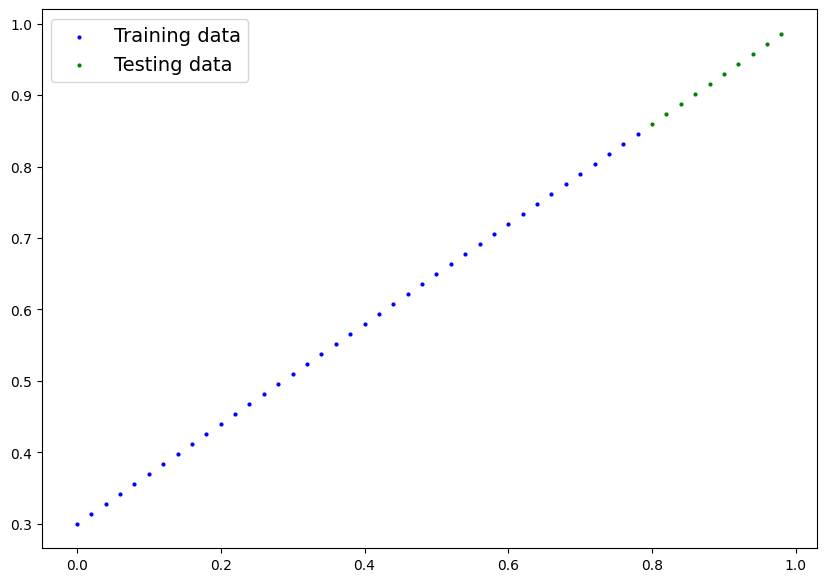

In [ ]:
#Plot the data
# Note: if you don't have the plot_predictions() function loaded, this will error
plot_prediction(X_train, y_train, X_test, y_test)

# 6.2 Building a PyTorch Linear Model

In [ ]:
#Building a Model
import torch
from torch import nn

class LinearRegression(nn.Module):
  def __init__(self):
    super().__init__()
    # Use nn.Linear() for creating the model parameters / also called: linear transform probing layer, fully connected layer, dense layer
    self.linear_layer = nn.Linear(in_features=1,
                                  out_features=1)

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

# Set the manual seed
torch.manual_seed(42)
model_1 = LinearRegression()
model_1, model_1.state_dict()

(LinearRegression(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [ ]:
X_train[:5], y_train[:5]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560]]))

In [ ]:
next(model_1.parameters()).device

device(type='cpu')

In [ ]:
#Set the model to use the target device
model_1.to(device)
next(model_1.parameters()).device

device(type='cpu')

### 6.3 Training

For training we need:
* Loss function
* Optimizer
* Training loop
* Testing loop

In [ ]:
# Setup the loss function
loss_fn = nn.L1Loss() # Same as MAE

#Setup our optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.01 )

#Let's write a training loop
torch.manual_seed(42)

epoch = 200

for epoch in range(epochs):
  model_1.train()

  # 1. Forward pass
  y_pred = model_1(X_train)

  #2. Calculate loss
  loss = loss_fn(y_pred, y_train)

  #3. Optimizer zero grad
  optimizer.zero_grad()

  #4. performance backpropogation
  loss.backward()

  #5. Optimizer loop
  optimizer.step()

  ### Testing
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)

    test_loss = loss_fn(test_pred, y_test)

  #Print out what's happening

  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Loss: 0.5551779866218567 | Test loss: 0.5739762187004089
Epoch: 10 | Loss: 0.4399680495262146 | Test loss: 0.4392663538455963
Epoch: 20 | Loss: 0.3247582018375397 | Test loss: 0.30455657839775085
Epoch: 30 | Loss: 0.20954827964305878 | Test loss: 0.16984674334526062
Epoch: 40 | Loss: 0.09433844685554504 | Test loss: 0.03513689711689949
Epoch: 50 | Loss: 0.023886386305093765 | Test loss: 0.04784906655550003
Epoch: 60 | Loss: 0.0199567973613739 | Test loss: 0.04580312222242355
Epoch: 70 | Loss: 0.016517987474799156 | Test loss: 0.0375305712223053
Epoch: 80 | Loss: 0.013089170679450035 | Test loss: 0.029944902285933495
Epoch: 90 | Loss: 0.009653178043663502 | Test loss: 0.02167237363755703
Epoch: 100 | Loss: 0.006215679459273815 | Test loss: 0.014086711220443249
Epoch: 110 | Loss: 0.002787243574857712 | Test loss: 0.005814164876937866
Epoch: 120 | Loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 130 | Loss: 0.0012645035749301314 | Test loss: 0.01380180753767

In [ ]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

In [ ]:
weight, bias

(0.7, 0.3)

### 6.4 Making and Evaluating predictions

In [ ]:
# Turn model into evaluation mode
model_1.eval()

#Make predictions on the test data
with torch.inference_mode():
  y_preds = model_1(X_test)
y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]])

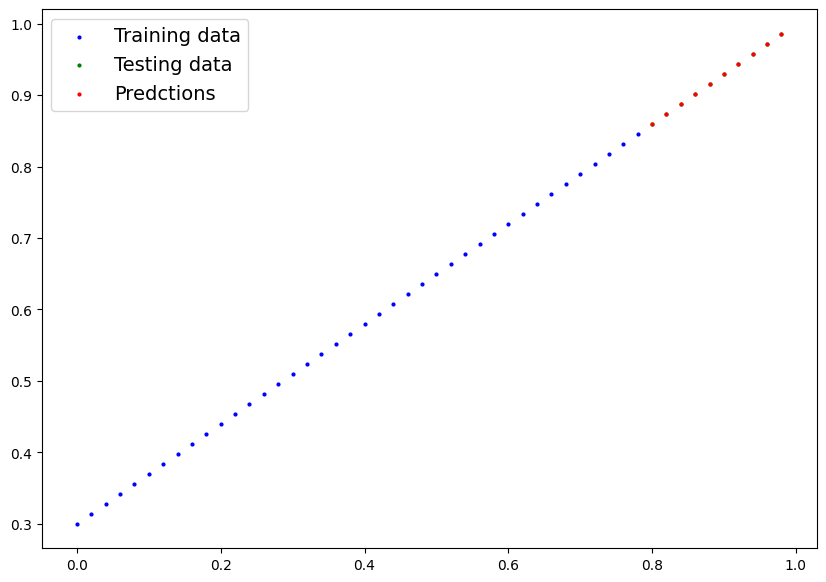

In [ ]:
# Check out our model predictions visually
plot_prediction(predictions=y_test)

### 6.5 Saving and loading model

In [ ]:
from pathlib import Path

Model_Path = Path("models")
Model_Path.mkdir(parents=True, exist_ok=True)

Model_name = "01_pytorch_workflow_model_1.pth"
Model_save_path = Model_Path / Model_name

torch.save(obj = model_1.state_dict(),
           f = Model_save_path)

In [ ]:
#Load a Model

#Create a new instance of Linear Regression Model
loaded_model_1 = LinearRegression()

#Load saved model
loaded_model_1.load_state_dict(torch.load(Model_save_path))

#Put loaded model to device
loaded_model_1.to(device)

LinearRegression(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [ ]:
next(loaded_model_1.parameters()).device

device(type='cpu')

In [ ]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

In [ ]:
#Evaluate the loaded model
loaded_model_1.eval()
with torch.inference_mode():
  loaded_model_1_preds = loaded_model_1(X_test)
y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## Exercises and Extra Curriculum


For exercises and extra curriculum, refer to: https://www.learnpytorch.io/01_pytorch_workflow/